# Übung 8: Clustering

##  Aufgabe 1: K-Means

Clustering ist eine Methode um mittles Unsupervised Learning zusammen gehörende Daten zu finden und kann für verschiedene Daten angewendet werden.

In dieser Übung möchten wir versuchen, damit ähnlichfarbige Objekte/Regionen in Bildern zu erkennen.

In [13]:
# OpenCV needs to be included first
import cv2
import numpy as np
import sklearn.cluster

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 400

### Hintergrund / Vordergrund Detektion
Als erstes möchten wir nochmals unsere Hintergrund Segmentierung der Hände anschauen. Können wir diese mit Clustering lösen?

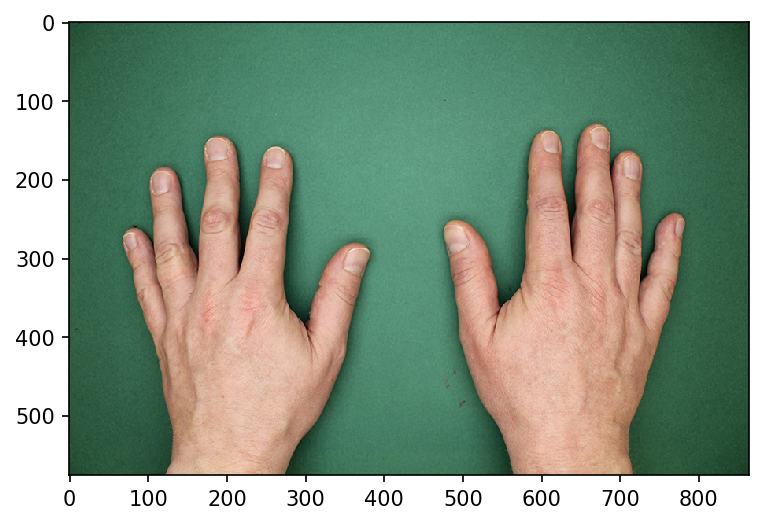

In [86]:
mpl.rcParams['figure.dpi']= 150
image  = cv2.imread('images/hand_green_small.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

OpenCV enthält eine Implementation von k-Means. Als Input wird dabei ein (1D-) Array von Farbwerten verwendet, sie müssen das Bild also von einem 2D Array von RGB in ein 1D Array von RGB umwandeln. Dazu kann reshape (numpy) verwendet werden.

Wenden Sie nun die Funktion `cv2.kmeans(...)` an. Als TermCriteria können sie die folgende Struktur benutzen, diese gibt an dass die kmeans Suche nach 100 Iterationen beendet werden soll, oder wenn sich die Cluster Zentren nicht mehr als 0.001 ändern. 

`criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001))`

Wenn Sie im Algorithmus keine Cluster Zentren initialisieren wollen, können sie als Labels `None` übergeben.

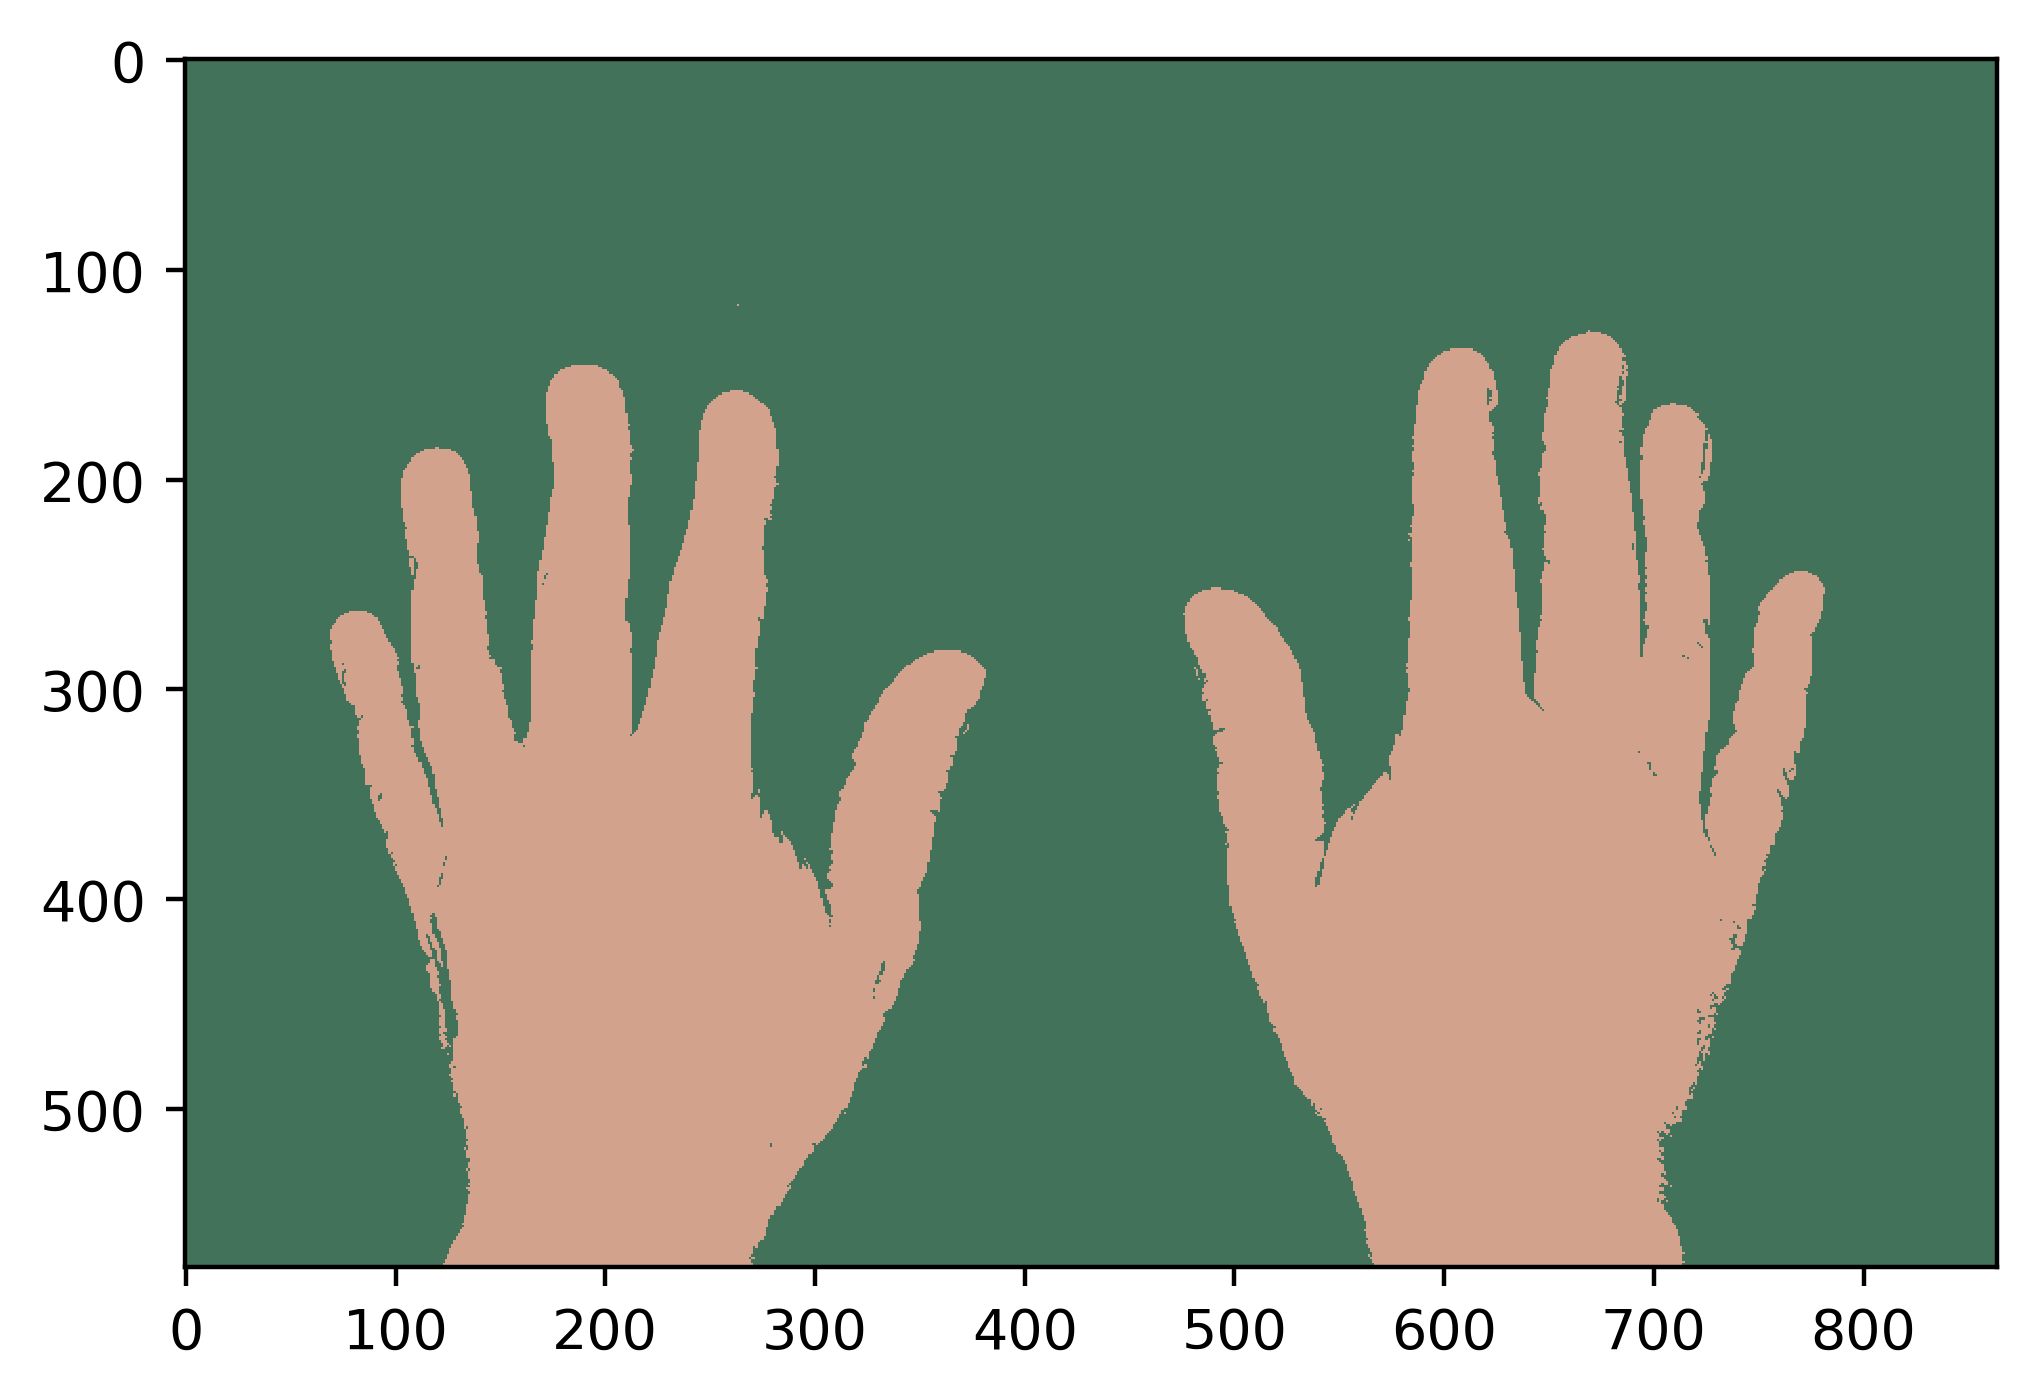

In [88]:
# reshape 2d image to 1d image with the 3 color dimensions remaining
image_1d = image.reshape((-1,3))

# convert to np.float32
data = np.float32(image_1d)

# define criteria, number of clusters
n_clusters = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

# apply kmeans
ret,label,center=cv2.kmeans(data,n_clusters,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# center = color values of the centers of the specified clusters, label = number specifying, to which 
# centre the pixel belongs (n clusters, label hast values from 0 - n-1), ret = ?

# convert float values of center into integer values
center = np.uint(center)

# for each pixel in the image, the color value of the center with the matching label is given. For example if 
# pixel 0,0 has label 1, then the color value of the second center is used
solution = center[label.flatten()]

# reshape the image to have the original shape
clustered_image = solution.reshape(image.shape)

#show image
mpl.rcParams['figure.dpi']= 400
plt.imshow(clustered_image)

Stellen Sie das Resultat wieder als Bild dar. Dazu können Sie zum Beispiel die Cluster Centers verwenden und das Label Bild wieder auf das 2 dimensionale Bildraster umformen.

Alternativ können Sie zur Überlagerung von Bildern und Label auch die Funktion ```skimage.color.label2rgb``` verwenden.

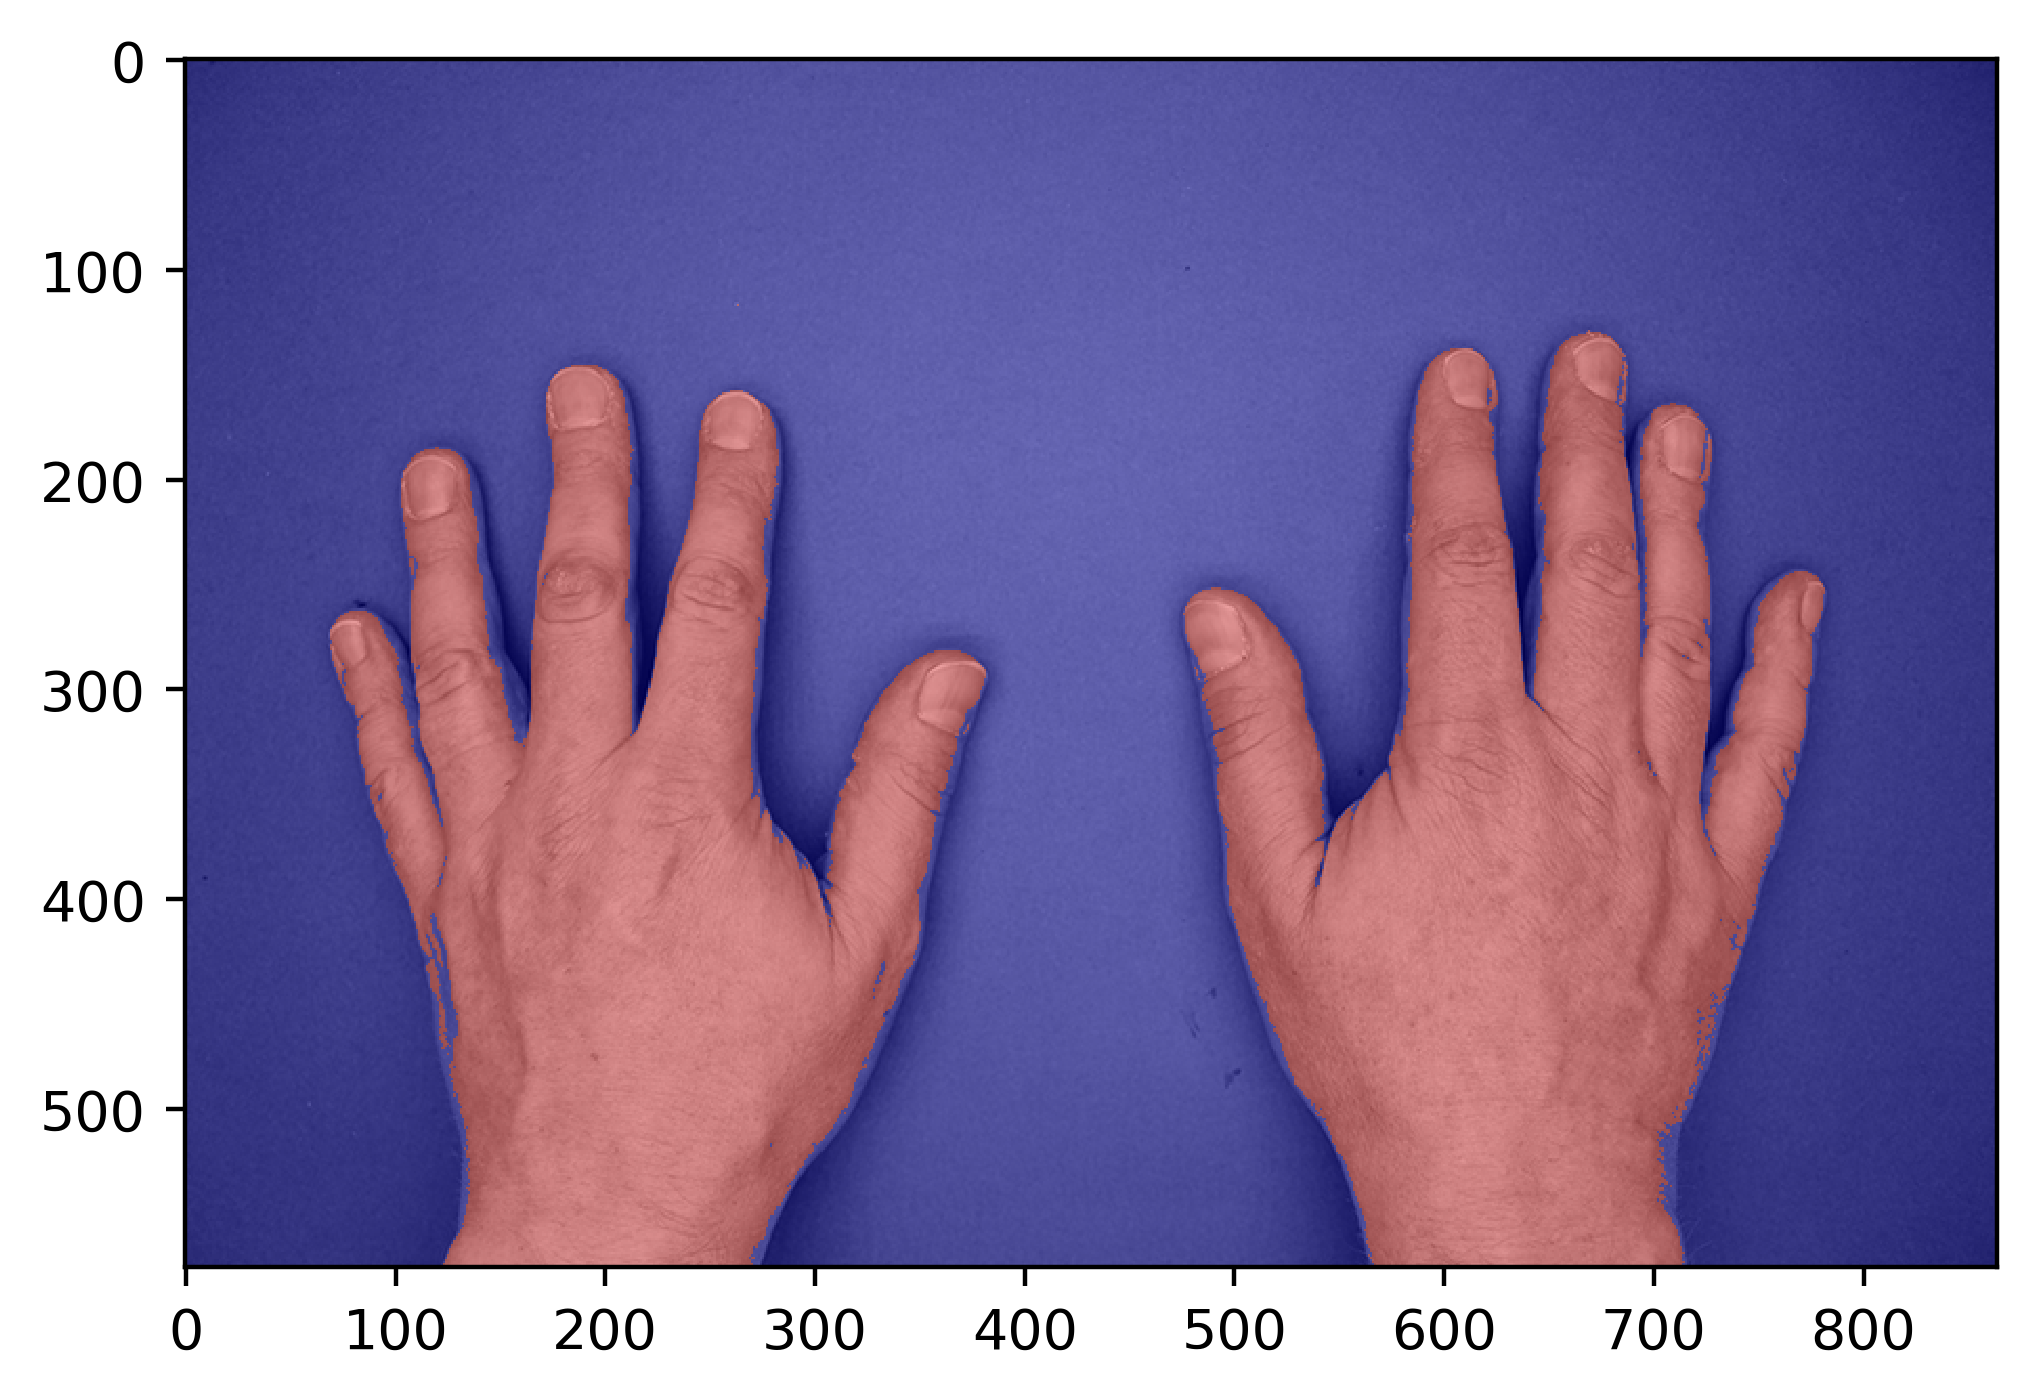

In [89]:
from skimage.color import label2rgb
# convert original image to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# make gray image 1d to have the same dimensions as labels
gray_1d = gray_image.reshape(-3,1)

# overlay labels and image
image_clustered = label2rgb(label, image=gray_id)

# reshape labeled image to have same dimensions as original image
clustered_image = image_clustered.reshape(image.shape)

plt.imshow(clustered_image)

### Mehrere Labels / Figuren

Auf dem nächsten Bild sollen nun die verschiedenen Figuren anhand ihrer Farbe detektiert werden. Dazu sind mehrere Cluster notwendig. 

Welche Anzahl Cluster funktioniert am besten?
Wie kann man die Güte der Ergebnisse beurteilen? 

Ein Problem ist, das ähnliche Farben von verschiedener Intensität in verschidenen Clustern enden. Also es entseht zum Beispiel ein Cluster mit Hellblau und einer mit Dunkelblau. Wie könnte das verhindert werden?

Implementieren Sie ein Clustering, sodass für jede Farbe nur ein Cluster erzeugt wird.



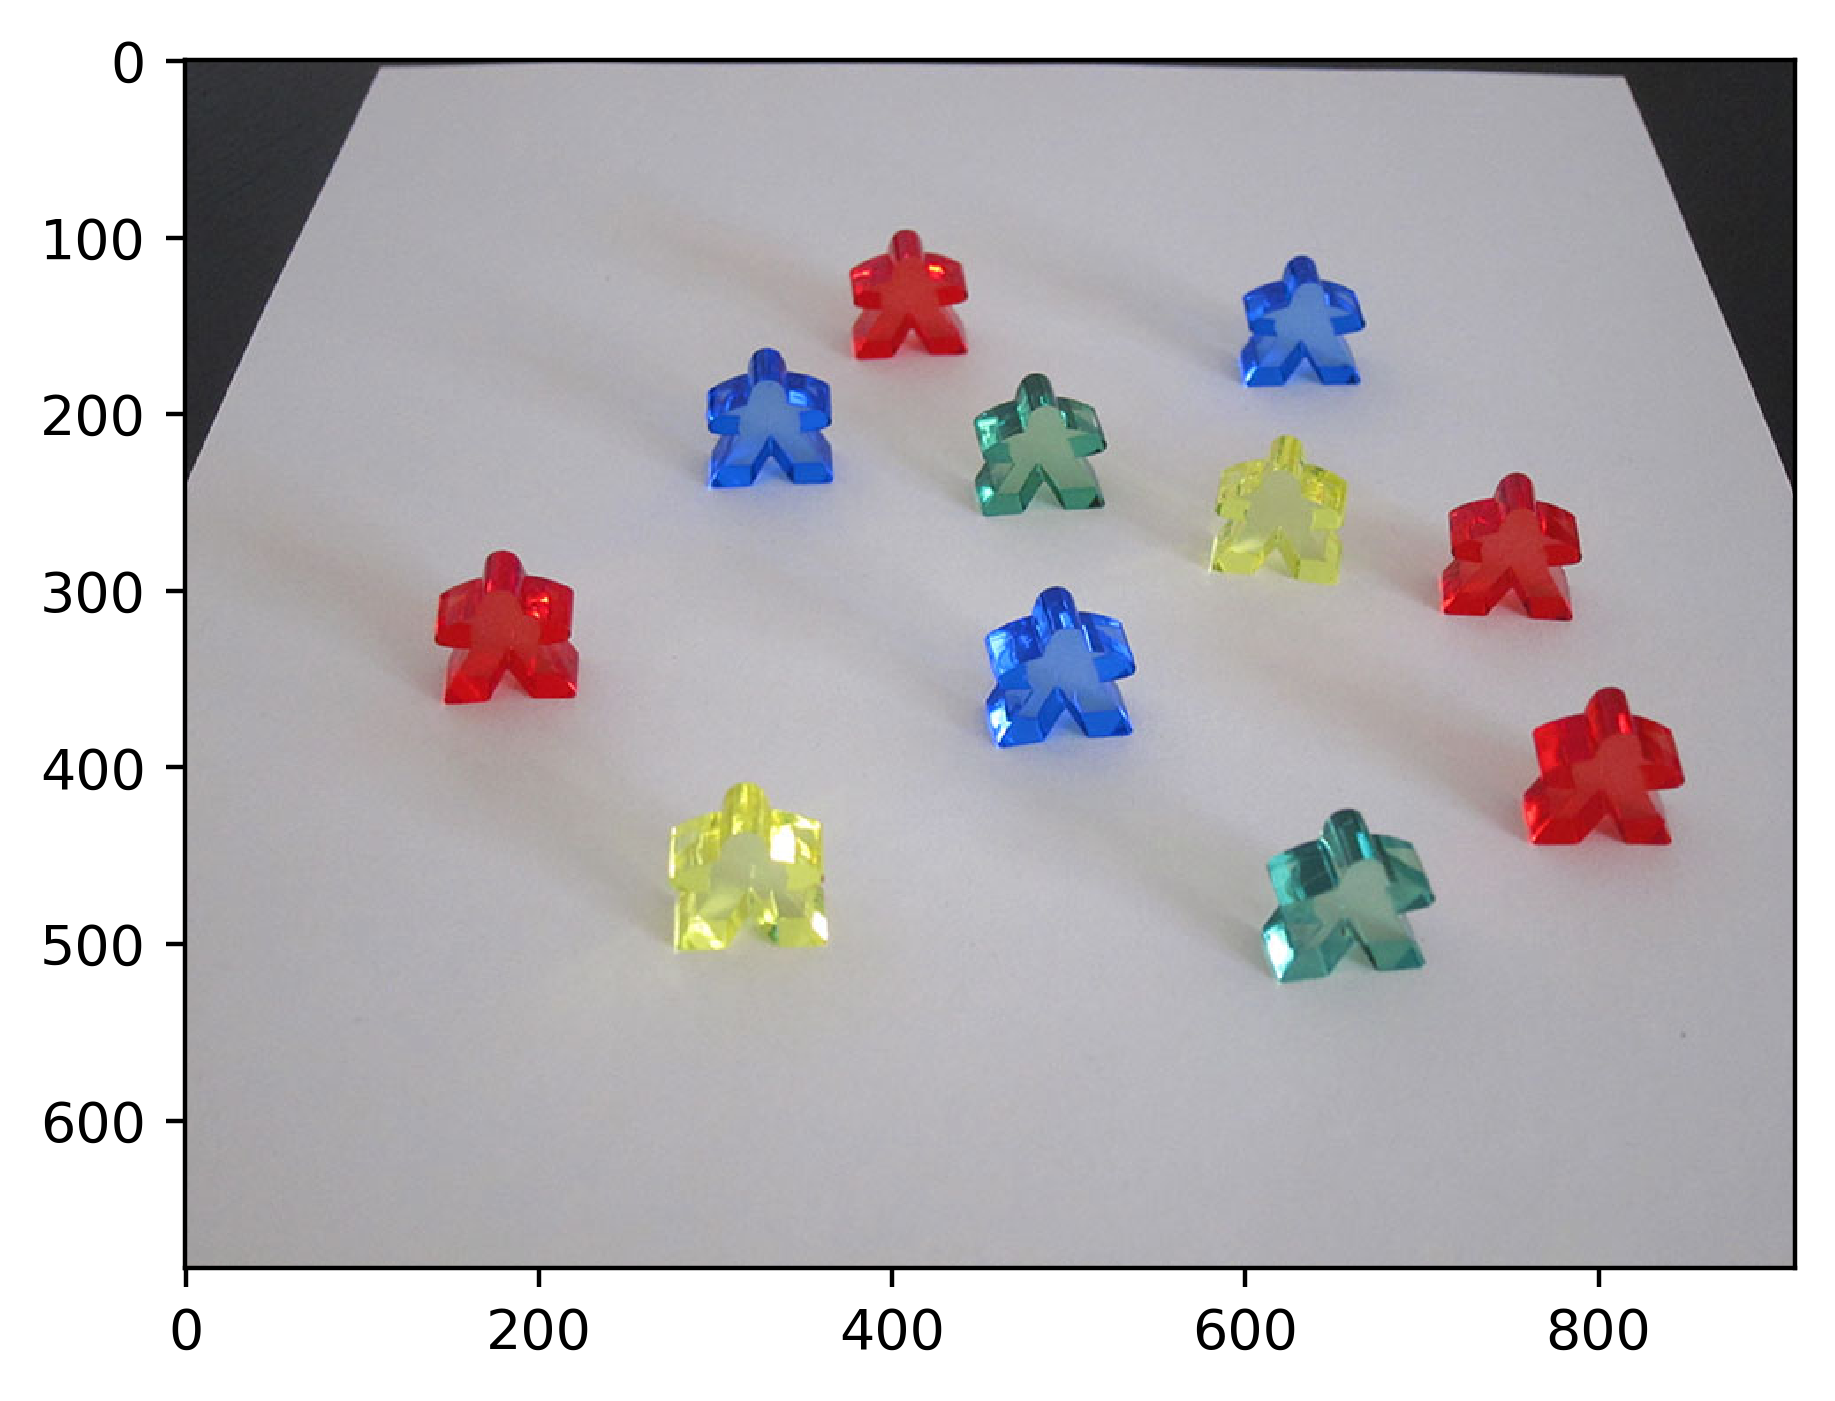

In [93]:
figures  = cv2.imread('images/figures.jpg')
figures = cv2.cvtColor(figures, cv2.COLOR_BGR2RGB)
mpl.rcParams['figure.dpi']= 400
plt.imshow(figures)

In [94]:
def k_means(img, nr_clusters):
    # reshape 2d image to 1d image with the 3 color dimensions remaining
    image_1d = img.reshape((-1,3))

    # convert to np.float32
    data = np.float32(image_1d)

    # define criteria, number of clusters
    n_clusters = nr_clusters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

    # apply kmeans
    ret,label,center=cv2.kmeans(data,n_clusters,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # center = color values of the centers of the specified clusters, label = number specifying, to which 
    # centre the pixel belongs (n clusters, label hast values from 0 - n-1), ret = ?

    # convert float values of center into integer values
    center = np.uint(center)

    # for each pixel in the image, the color value of the center with the matching label is given. For example if 
    # pixel 0,0 has label 1, then the color value of the second center is used
    solution = center[label.flatten()]

    # reshape the image to have the original shape
    clustered_image = solution.reshape(figures.shape)
    print(ret)
    return clustered_image

759706077.4378517
508115799.6366395
321187316.34848773
111403698.66309032


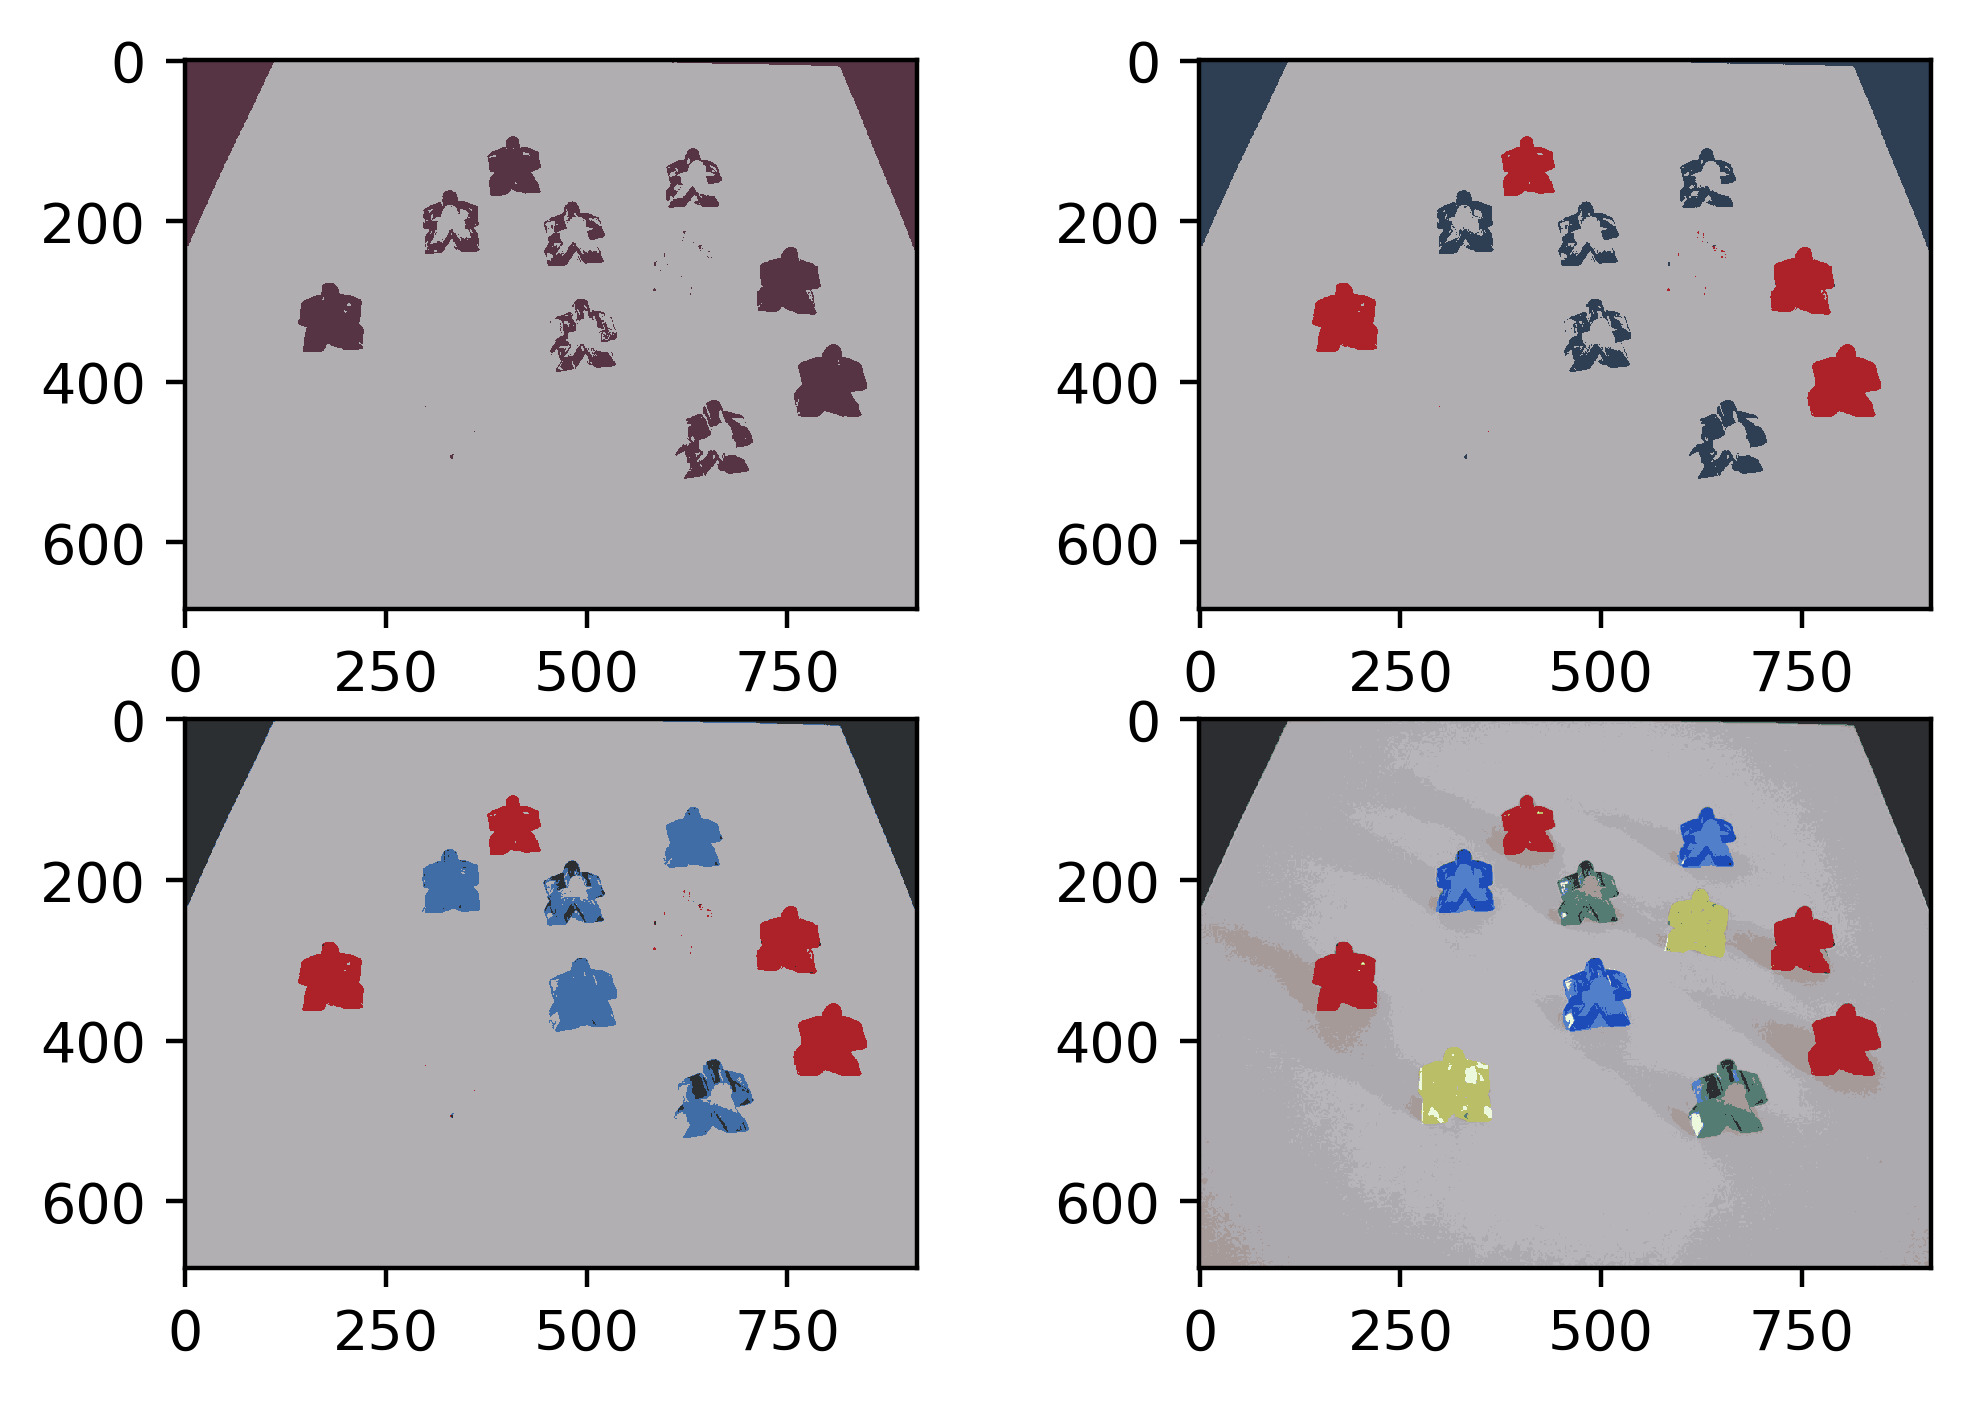

In [95]:
img_3 = k_means(figures, 2)
img_4 = k_means(figures, 3)
img_5 = k_means(figures, 4)
img_10 = k_means(figures, 10)

plt.subplot(2,2,1)
plt.imshow(img_3)
plt.subplot(2,2,2)
plt.imshow(img_4)
plt.subplot(2,2,3)
plt.imshow(img_5)
plt.subplot(2,2,4)
plt.imshow(img_10)

## Aufgabe 2: Clustering in Positions- und Farbraum

Bei obiger Aufgabe wurde nur nach Farbe geclustered, also gehören zum Beispiel die grünen Figuren zusammen. Wir können auch versuchen nach Positionen und Farben zu Clustern. Der Input zu k-Means wäre dann nicht mehr ein nx3 sondern ein nx5 Array. 

Implementieren Sie dieses und interpretieren Sie das Resultat. Entspricht das den Erwartungen?


In [8]:
image = cv2.imread('images/figures.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

data_col = image.reshape((-1, 3)).astype(np.float32) / 255

idx = np.indices((image.shape[0], image.shape[1]))
idx_all = np.stack([idx[0,:,:], idx[1,:,:]], axis=2)
factor = 1.0
data_idx = idx_all.reshape((-1, 2)).astype(np.float32) * factor /np.max(idx_all)
data = np.concatenate([data_col, data_idx], axis=1)

In [16]:
kmeans = sklearn.cluster.KMeans(n_clusters=15)
kmeans.fit(data)
kmeans.cluster_centers_
labels_image = kmeans.labels.reshape((image.shape[0], image.shape[1]))
plt.imshow(skimage.color.label2rgb(labels_image))

AttributeError: 'KMeans' object has no attribute 'labels'

## Aufgabe 3: Mean Shift

OpenCV enthält auch eine Funktion um Mean Shift durchzuführen: `pyrMeanShiftFiltering`. Allerdings kann diese nur direkt auf Bildern angewendet werden und nicht auf allgemeine Daten. 

Wenden Sie die Funktion auf das ursprüngliche Bild an und interpretieren Sie das Resultat.

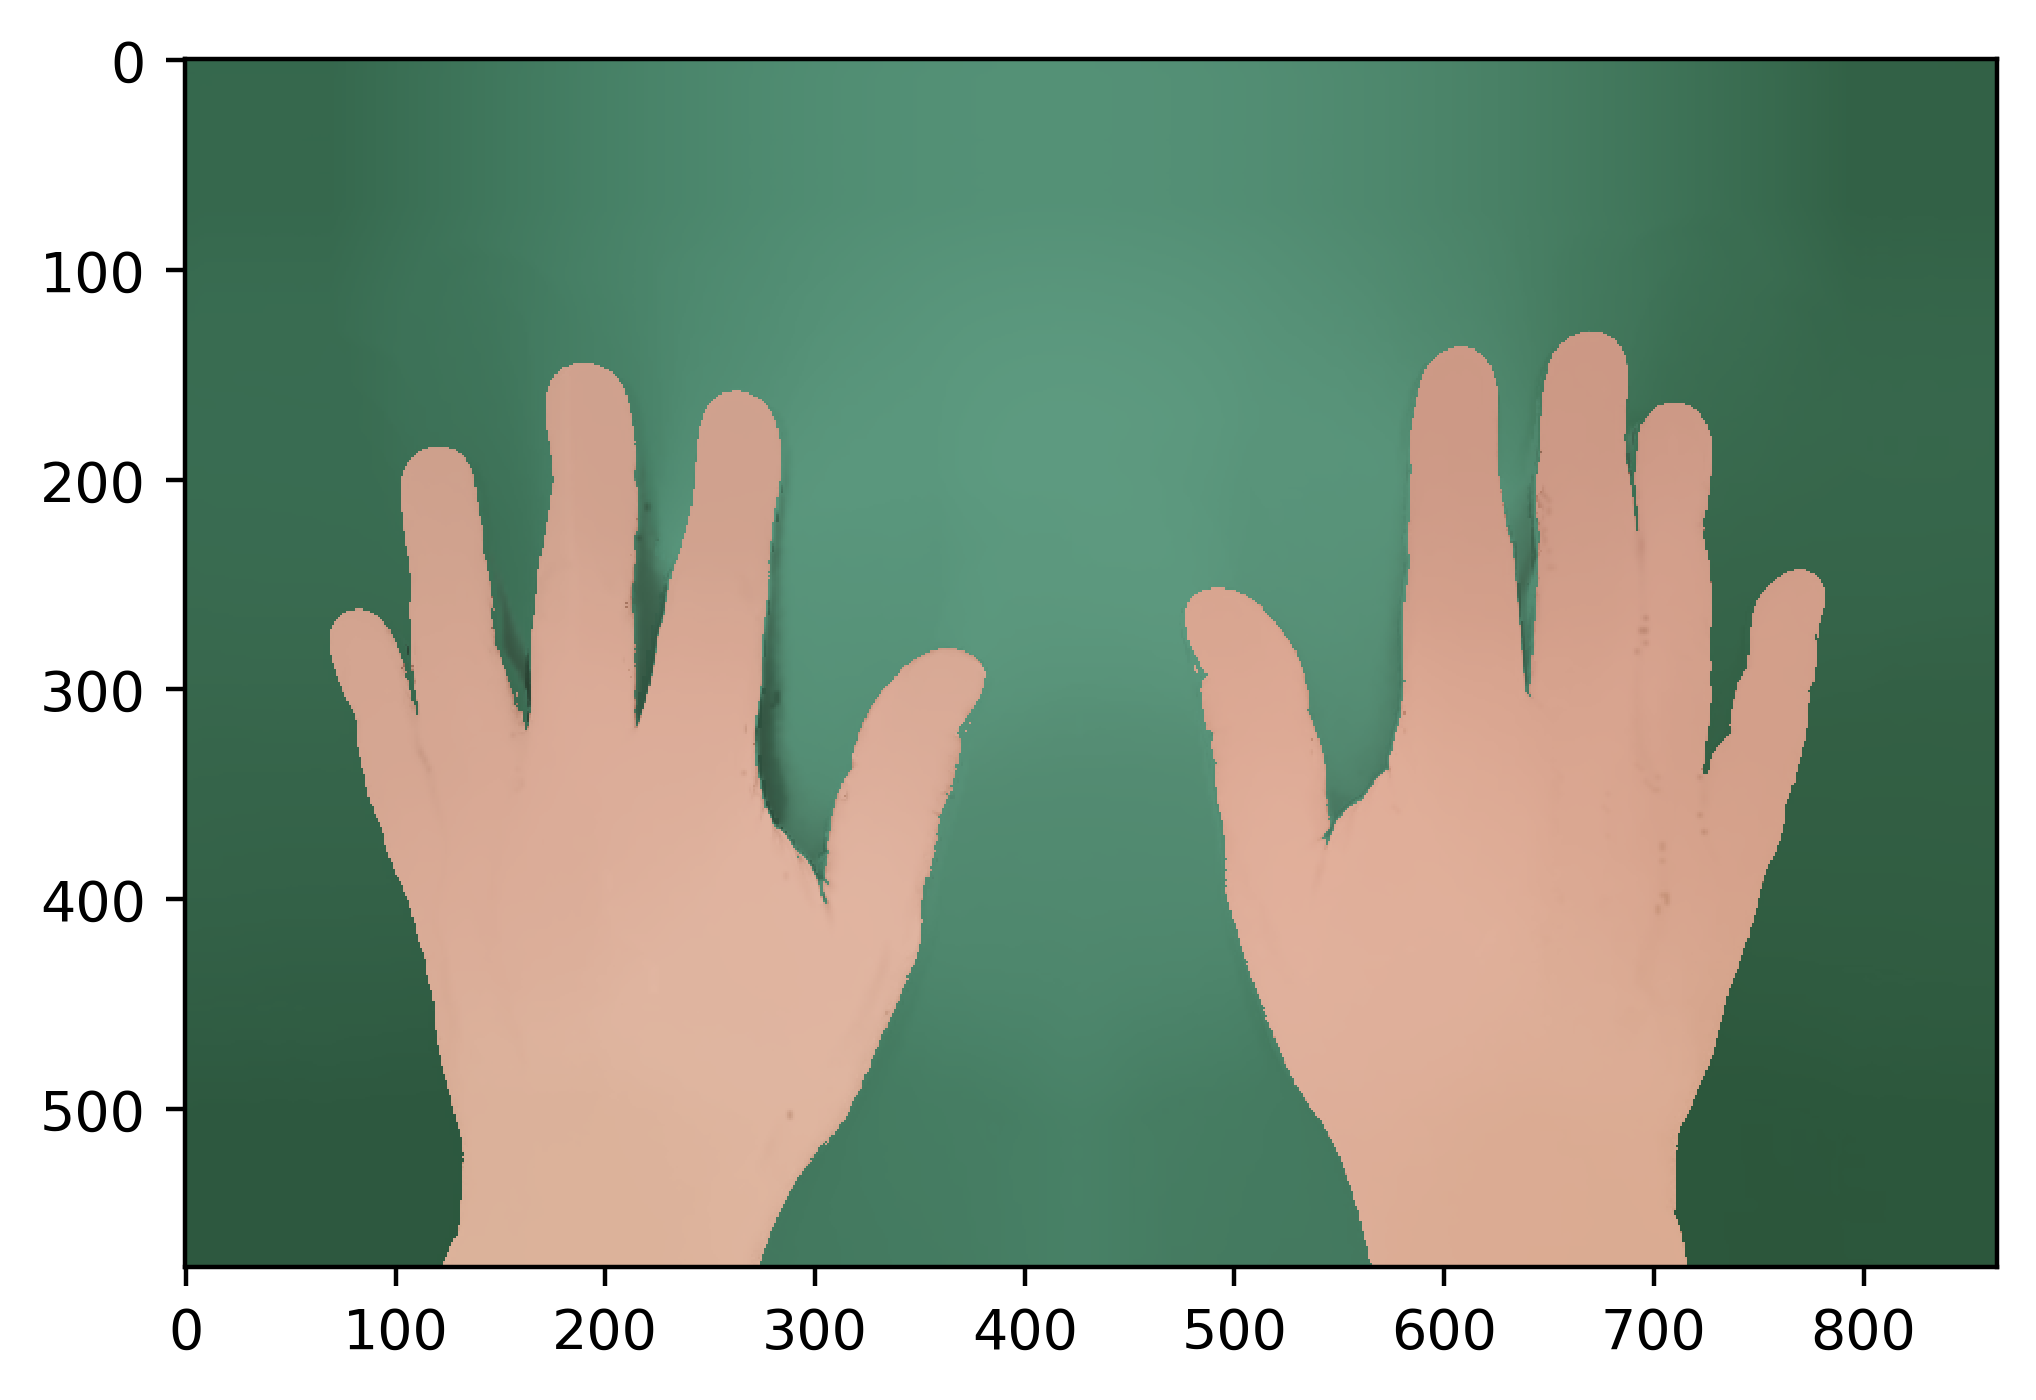

In [38]:
mean_shift_image = cv2.pyrMeanShiftFiltering(image, 70, 70)
plt.imshow(mean_shift_image)